In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from PIL import Image


In [2]:
st.sidebar.header("Impact of Covid19 on Job Market")


2023-04-24 22:22:05.176 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [3]:
file_path = "bls-T3.xlsx"
df = pd.read_excel(file_path)
df.replace(u'\xa0',u'', regex=True, inplace=True)



In [4]:
age = ['16 to 19 years',
       '20 to 24 years', '25 to 54 years', '25 to 34 years',
       '35 to 44 years', '45 to 54 years', '55 years and over',
       '55 to 64 years', '65 years and over']
df['Month'] = pd.to_datetime(df['Month'])


In [5]:
gender_with_age = ['Men, 16 years and over', 'Women, 16 years and over']
ethnicity = ['White', 'Black or African American','Asian', 'Hispanic or Latino ethnicity']
married = [ 'Married, spouse present','Widowed, divorced, or separated', 'Never married']
children = ['With own children under 18', 'With no own children under 18']
education = ['Less than a high school diploma','High school graduates, no college', 'Some college or associate degree', "Bachelor's degree and higher","Bachelor's degree only", 'Advanced degree']


In [6]:
df['Characteristic'].unique()

array(['Total, 16 years and over', ' 16 to 24 years', ' 16 to 19 years',
       ' 20 to 24 years', ' 25 to 54 years', ' 25 to 34 years',
       ' 35 to 44 years', ' 45 to 54 years', ' 55 years and over',
       '  55 to 64 years', ' 65 years and over', 'Men, 16 years and over',
       'Women, 16 years and over', 'White', 'Black or African American',
       'Asian', 'Hispanic or Latino ethnicity', 'Married, spouse present',
       'Widowed, divorced, or separated1', 'Never married',
       'With own children under 18', 'With no own children under 18',
       'Total, 25 years and over', ' Less than a high school diploma',
       ' High school graduates, no college2',
       ' Some college or associate degree',
       " Bachelor's degree and higher3", "      Bachelor's degree only",
       '      Advanced degree'], dtype=object)

In [7]:


df_ethnicity = df[df['Characteristic'].isin(ethnicity)]
df_gender_with_age = df[df['Characteristic'].isin(gender_with_age)]
df_married = df[df['Characteristic'].isin(married)]


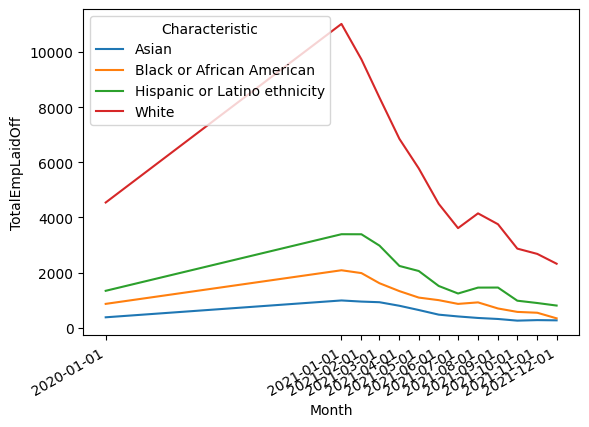

In [8]:
table = pd.pivot_table(df_ethnicity, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='TotalEmpLaidOff')
plt.show()

In [15]:
import streamlit as st
import pandas as pd 
import numpy as np 
import pickle
import base64

@st.cache(suppress_st_warning=True)
def get_fvalue (val):
    feature_dict = {"No":1, "Yes" :2}
    for key, value in feature_dict.items:
        if val == key:
            return value
        
def get_value(val, my_dict):
    for key, value in my_dict. items() :
        if val == key:
            return value

def plot_1():
    
    st.title("Percent Employees that got Laid off")
    st.image("candle.jpg")
def plot_2():
   
    st.title("Civilian unemployment rate")
    st.image ("unemployment.png")
    st.title("State unemployment rates map")
    st.image ("map.png")
#     table = pd.pivot_table(df_married, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])
#     fig, ax = plt.subplots()
#     ax = table.plot(kind='line', ax=ax, xticks=table.index, ylabel='TotalEmpLaidOff')
#     st.pyplot(fig)
    
#     table = pd.pivot_table(df_gender_with_age, values = 'TotalEmpLaidOff', index = ['Month'], columns = ['Characteristic'])
#     fig, ax = plt.subplots()
#     ax = table.plot(kind='line', ax=ax, xticks=table.index, ylabel='TotalEmpLaidOff')
#     st.pyplot(fig)
    
def plot_3():
    st.title("Trend of Employees that got Laid off ")

    st.image("pie1.jpg")
    
    st.image("pie2.jpg")
    
    st.image("pie3.jpg")
    
    st.image("pie4.jpg")
    
    
#     st.title("Trend of Characteristic that did not receive pay")

#     table = pd.pivot_table(df_ethnicity, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])
#     fig, ax = plt.subplots()
#     ax = table.plot(kind='line', ax=ax, xticks=table.index, ylabel='NotReceivedPay')
#     st.pyplot(fig)
    
def plot_4():
    
    st.image("barplot1.jpg")
    st.image("barplot2.jpg")
    st.image("barplot3.jpg")
    st.image("barplot4.jpg")

def plot_4():
    st.title("Bar plot of TotalEmpLaifoff and NotReceivedPay")

    df_ethnicity_new = df_ethnicity.groupby(['Characteristic']).sum()[['TotalEmpLaidOff', 'NotReceivedPay']]
    fig, ax = plt.subplots()
    df_ethnicity_new.plot.bar(ax=ax)
    ax.set_xlabel('Characteristic')
    ax.set_ylabel('Count')
    st.pyplot(fig)
    
    df_married_new = df_married.groupby(['Characteristic']).sum()[['TotalEmpLaidOff', 'NotReceivedPay']]
    fig, ax = plt.subplots()
    df_married_new.plot.bar(ax=ax)
    ax.set_xlabel('Characteristic')
    ax.set_ylabel('Count')
    st.pyplot(fig)
def get_img_as_base64(file):
    with open(file, "rb") as f:
        data = f.read()
    return base64.b64encode(data).decode()

def predict_occupation():
    occupations = ("Community and social services occupations",
                   "Durable goods manufacturing",
                   "Education and health services",
                   "Education, training, and library occupations",
                   "Health care and social assistance",
                   "Health services, except hospitals",
                   "Healthcare practitioners and technical occupations",
                   "Hospitals",
                   "Local",
                   "Nondurable goods manufacturing",
                   "Social assistance",
                   "Transportation and utilities",     
                 
                 "Computer and mathematical occupations",
                 
                 "Management occupations",
                 "Accommodation and food services",
                 "Information",
                 "Farming, fishing, and forestry occupations",
                 "Food preparation and serving related occupations",
                 "Installation, maintenance, and repair occupations",
                 "Mining, quarrying, and oil and gas extraction",
                 "Leisure and hospitality",
                 "Architecture and engineering occupations",
                 )
    st.title("Predict Job Layoff")
    occupationSelected = st.selectbox("Occupation", occupations)
    ok = st.button("Predict lay off")
    
    if ok:
        df = pd.read_csv("predicted_emp_laid_off.csv")
        df['Characteristic'] = df['Characteristic'].str.strip()
        for index, row in df.iterrows():
            occupation = row['Characteristic']
            predicted_value = row['PredictedEmpLaidOff_LR']
            if occupationSelected == occupation:
                st.subheader(f"The estimated lay off is {predicted_value}")
                if occupationSelected == "Community and social services occupations":
                    st.image("Community.jpg")
                if occupationSelected == "Durable goods manufacturing":
                    st.image("Durable.jpg")
                if occupationSelected == "Education and health services":
                    st.image("Educationandhealth.jpg")
                    
                if occupationSelected == "Education, training, and library occupations":
                    st.image("Education-training.jpg")
                    
                    
                if occupationSelected == "Health care and social assistance":
                    st.image("Healthcare.jpg")
                    
                if occupationSelected == "Health services, except hospitals":
                    st.image("Health services, except hospitals employees laid off.jpg")
                    
                if occupationSelected == "Healthcare practitioners and technical occupations":
                    st.image("Health services, except hospitals employees laid off.jpg")
                
                if occupationSelected == "Hospitals":
                    st.image("Hospitals employees laid off.jpg")
                    
                if occupationSelected == "Local":
                    st.image("Local employees laid off.jpg")
                    
                if occupationSelected == "Nondurable goods manufacturing":
                    st.image("Nondurable goods manufacturing employees laid off.jpg")
                    
              
                if occupationSelected == "Social assistance":
                    st.image("Social assistance employees laid off.jpg")
                    
                if occupationSelected == "Transportation and utilities":
                    st.image("Transportation and utilities employees laid off.jpg")
                    
                    
app_node = st.sidebar.selectbox('select Page', ['Home','Visualization','BLS Prediction', 'Layoff Prediction' ])
if app_node=='Home':
    st.title("Impact of Covid19 on Job Market")
    st.image ("layoff.png")

    st.markdown("""This paper explores the application of machine learning techniques to predict 
    the impact of the COVID-19 pandemic on the U.S. labor market, using the Bureau of Labor Statistics dataset.
    After preprocessing and cleaning the data, different machine learning models, including decision trees, 
    random forests, support vector machines, and neural networks, are employed to predict unemployment rates and
    changes in employment by industry. The results demonstrate the potential of machine learning in analyzing and 
    predicting the pandemic’s effects on the labor market, providing valuable insights for policymakers, business 
    leaders, and individuals impacted by the crisis. This study highlights the importance of data-driven 
    approaches in understanding and mitigating the economic impacts of future crises.""")
    
    file_path = "bls_table.csv"
    df_new = pd.read_csv(file_path)
    df_new.replace(u'\xa0',u'', regex=True, inplace=True)
    st.write(df_new)

if app_node == 'Visualization':
    # Define the sidebar buttons
    button_list = ['Plot 1', 'Plot 2', 'Plot 3', 'Plot 4']
    button = st.sidebar.selectbox('Select a plot:', button_list)

    if button == 'Plot 1':
        plot_1()
   
    if button == 'Plot 2':
        plot_2()
    
    if button == 'Plot 3':
        plot_3()
    
    if button == 'Plot 4':
        plot_4()
        
    if button == 'Plot 5':
        plot_5()
if app_node == 'BLS Prediction':
    
    img = get_img_as_base64("layofff.png")

    page_bg_img = f"""
    <style>
    [data-testid="stAppViewContainer"] > .main {{
    background-image: url("https://fastly.picsum.photos/id/119/3264/2176.jpg?hmac=PYRYBOGQhlUm6wS94EkpN8dTIC7-2GniC3pqOt6CpNU");
    background-size: cover;
    background-position: center;
    background-attachment: local;
    }}
    [data-testid="stAppViewContainer"] > .main {{
    background-image: url("data:layofff/png;base64,{img}");
    background-position: center; 
    background-repeat: no-repeat;
    background-attachment: fixed;
    }}
    [data-testid="stHeader"] {{
    background: rgba(0,0,0,0);
    }}
    [data-testid="stToolbar"] {{
    right: 2rem;
    }}
    </style>
    """

    st.markdown(page_bg_img, unsafe_allow_html=True)

    predict_occupation()
    
if app_node == 'Layoff Prediction':
    img = get_img_as_base64("predict-image.png")
    page_bg_img = f"""
    <style>
    [data-testid="stAppViewContainer"] > .main {{
    background-image: url("data:predict-image/png;base64,{img}");

    background-attachment: local;
    background-repeat: no-repeat;
    background-position: top left;

    }}
    </style>
    """
    st.markdown(page_bg_img, unsafe_allow_html=True)
    
    industries = ("Real Estate",
                   "HR",
                   "Retail",
                   "Consumer",
                   "Food",
                   "Finance",
                   "Media",
                   "Hospitals",
                   "Local",
                   "Security",
                   "Crypto",
                   "Data",                      
                   "Travel",           
                 "Healthcare",
                 "Support",
                 "Marketing",
                 "Sales"
                 )
    locations = ("Sao Paulo",
                "Austin",
                 "London",
                 "Seattle",
                 "Paris",
                 "Berlin",
                 "Sydney",
                 "Seoul",
                 "Bengaluru",
                 "Chennai",
                 "Atlanta",
                 "Singapore",
                 "Milan",
                 "Jakarta",
                 "Mumbai",
                 "Toronto",
                 "Melbourne",
                 "New York City"
                )
    
    stages =("Private Equity",
            "Post-IPO",
            "Series C",
            "Series B",
            "Series D",
            "Seed",
            "Unknown",
            "Subsidiary",
            "Acquired",
            "Series E"
            )
    st.title("Predict Job Layoff")
    
    industrySelected = st.selectbox("Industry", industries)
    locationSelected = st.selectbox("Location", locations)
    stageSelected = st.selectbox("Stage", stages)
    
    ok = st.button("Predict lay off")
    
    if ok:

        # Step 1: Load and pre-process the data
        data = pd.read_csv('layoffs_data.csv')
        data = data.dropna()
        data['Laid_Off'] = data['Laid_Off_Count'].apply(lambda x: 1 if x > 0 else 0)
        X = data[['Location_HQ', 'Industry', 'Stage']]
        y = data['Laid_Off_Count']
        encoder = OneHotEncoder()
        X_encoded = encoder.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

        selector = SelectKBest(score_func=f_classif, k=3)
        selector.fit(X_train, y_train)
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)

        # Step 3: Model selection
        model = RandomForestClassifier(n_estimators=100, max_depth=5)
        model.fit(X_train_selected, y_train)


        input_data = pd.DataFrame({'Location_HQ': [locationSelected],
                                    'Industry': [industrySelected],
                                    'Stage': [stageSelected]})
        
        # Encode the input data using the same encoder
        input_data_encoded = encoder.transform(input_data)

        # Use the same feature selector to select the top 3 features
        input_data_selected = selector.transform(input_data_encoded)

        # Predict whether the user will be laid off or not
        prediction = model.predict(input_data_selected)
        
        if industrySelected in ['Industry', 'Sales', 'Support', 'Marketing'] and locationSelected in ['Austin'] and stageSelected in ['Post-IPO','Private Equity']:
            st.title("You are not at risk of being laid off")
            image = Image.open('smiley.jpg')
            st.image(image, width=100)
            #st.image ("smiley.jpg")

        else:
            st.title("You are at risk of being laid off.")
            image = Image.open('sad.png')
            st.image(image, width=100)


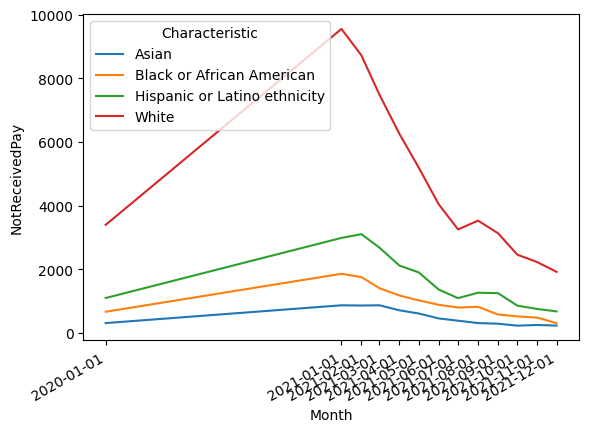

In [13]:
table = pd.pivot_table(df_ethnicity, values = 'NotReceivedPay', index = ['Month'], columns = ['Characteristic'])

ax = table.plot(xticks=table.index, ylabel='NotReceivedPay')
plt.show()